# Importing Libraries

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from datetime import timedelta
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# Reading the Data

In [108]:
employee_survey_data = pd.read_csv(r'C:\Users\Saurabh\Downloads\archive\employee_survey_data.csv')
general_data = pd.read_csv(r'C:\Users\Saurabh\Downloads\archive\general_data.csv')
start_time = pd.read_csv(r'C:\Users\Saurabh\Downloads\archive\in_time.csv')
manager_survey_data = pd.read_csv(r'C:\Users\Saurabh\Downloads\archive\manager_survey_data.csv')
finish_time = pd.read_csv(r'C:\Users\Saurabh\Downloads\archive\out_time.csv')

In [109]:
print(general_data.head())

   Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   NumCompaniesWorked Over18 PercentSalaryHike  StandardHours  \
0                 1.0

In [110]:
print(employee_survey_data.head())

   EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
0           1                      3.0              4.0              2.0
1           2                      3.0              2.0              4.0
2           3                      2.0              2.0              1.0
3           4                      4.0              4.0              3.0
4           5                      4.0              1.0              3.0


In [111]:
print(manager_survey_data.head())

   EmployeeID  JobInvolvement  PerformanceRating
0           1               3                  3
1           2               2                  4
2           3               3                  3
3           4               2                  3
4           5               3                  3


In [112]:
print(start_time.head())

   Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 09:43:45  2015-01-05 10:08:48   
1           2         NaN  2015-01-02 10:15:44  2015-01-05 10:21:05   
2           3         NaN  2015-01-02 10:17:41  2015-01-05 09:50:50   
3           4         NaN  2015-01-02 10:05:06  2015-01-05 09:56:32   
4           5         NaN  2015-01-02 10:28:17  2015-01-05 09:49:58   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 09:54:26  2015-01-07 09:34:31  2015-01-08 09:51:09   
1                  NaN  2015-01-07 09:45:17  2015-01-08 10:09:04   
2  2015-01-06 10:14:13  2015-01-07 09:47:27  2015-01-08 10:03:40   
3  2015-01-06 10:11:07  2015-01-07 09:37:30  2015-01-08 10:02:08   
4  2015-01-06 09:45:28  2015-01-07 09:49:37  2015-01-08 10:19:44   

            2015-01-09           2015-01-12           2015-01-13  ...  \
0  2015-01-09 10:09:25  2015-01-12 09:42:53  2015-01-13 10:13:06  ...   
1  2015-01-09 09:4

In [113]:
print(finish_time.head())

   Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 16:56:15  2015-01-05 17:20:11   
1           2         NaN  2015-01-02 18:22:17  2015-01-05 17:48:22   
2           3         NaN  2015-01-02 16:59:14  2015-01-05 17:06:46   
3           4         NaN  2015-01-02 17:25:24  2015-01-05 17:14:03   
4           5         NaN  2015-01-02 18:31:37  2015-01-05 17:49:15   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 17:19:05  2015-01-07 16:34:55  2015-01-08 17:08:32   
1                  NaN  2015-01-07 17:09:06  2015-01-08 17:34:04   
2  2015-01-06 16:38:32  2015-01-07 16:33:21  2015-01-08 17:24:22   
3  2015-01-06 17:07:42  2015-01-07 16:32:40  2015-01-08 16:53:11   
4  2015-01-06 17:26:25  2015-01-07 17:37:59  2015-01-08 17:59:28   

            2015-01-09           2015-01-12           2015-01-13  ...  \
0  2015-01-09 17:38:29  2015-01-12 16:58:39  2015-01-13 18:02:58  ...   
1  2015-01-09 16:5

In [114]:
print('General data shape:', general_data.shape)
print('Employee survey data shape:', employee_survey_data.shape)
print('Manager survey data shape:', manager_survey_data.shape)
print('Start working time data shape', start_time.shape)
print('End working time data shape:', finish_time.shape)

General data shape: (4410, 24)
Employee survey data shape: (4410, 4)
Manager survey data shape: (4410, 3)
Start working time data shape (4410, 262)
End working time data shape: (4410, 262)


In [115]:
# Firstly, change column name Unnamed: 0 to EmployeeID in start and end time datasets.
start_time.rename(columns={'Unnamed: 0':'EmployeeID'}, inplace=True)
finish_time.rename(columns={'Unnamed: 0':'EmployeeID'}, inplace=True)

In [116]:
#Let's set the column named EmployeeID in all files. We are getting ready for merging.
general_data.set_index('EmployeeID', inplace=True)
employee_survey_data.set_index('EmployeeID', inplace=True)
manager_survey_data.set_index('EmployeeID', inplace=True)
start_time.set_index('EmployeeID', inplace=True)
finish_time.set_index('EmployeeID', inplace=True)

# Joining all the dataframes on a common column "Employee ID"

In [117]:
#we will combine the files of general_data, employee_survey_data, manager_survey_data. We need to change time files before merging.
main_data = pd.concat([general_data, employee_survey_data, manager_survey_data], axis = 1)
print(main_data.columns.values)


['Age' 'Attrition' 'BusinessTravel' 'Department' 'DistanceFromHome'
 'Education' 'EducationField' 'EmployeeCount' 'Gender' 'JobLevel'
 'JobRole' 'MaritalStatus' 'MonthlyIncome' 'NumCompaniesWorked' 'Over18'
 'PercentSalaryHike' 'StandardHours' 'StockOptionLevel'
 'TotalWorkingYears' 'TrainingTimesLastYear' 'YearsAtCompany'
 'YearsSinceLastPromotion' 'YearsWithCurrManager'
 'EnvironmentSatisfaction' 'JobSatisfaction' 'WorkLifeBalance'
 'JobInvolvement' 'PerformanceRating']


In [133]:
print(main_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 1 to 4410
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int32  
 2   BusinessTravel           4410 non-null   int32  
 3   Department               4410 non-null   int32  
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   int32  
 7   Gender                   4410 non-null   int32  
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   int32  
 10  MaritalStatus            4410 non-null   int32  
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4410 non-null   float64
 13  Over18                   4410 non-null   int32  
 14  PercentSalaryHike       

In [134]:
main_data.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

In [120]:
# Imputing missing data for Numerical with mean value / Zeros 


colname2=['NumCompaniesWorked','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance']
for x in colname2[:]:
    main_data[x].fillna(main_data[x].mean(),inplace=True)
    
main_data.isnull().sum()
main_data.shape

(4410, 28)

In [121]:
#Dropping these variables beacuse of no variance
main_data.drop(['EmployeeCount','StandardHours'],axis=1, inplace = True)

# Checking for Multicollinearity

In [122]:
corr_cols = main_data[['Age','Attrition','BusinessTravel','DistanceFromHome','Education', 'EducationField','Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

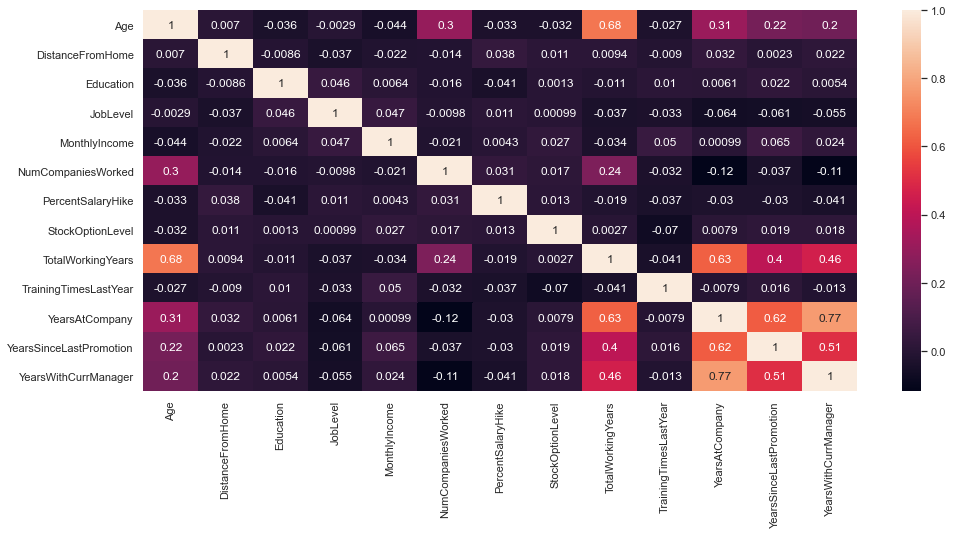

In [123]:
corr = corr_cols.corr()
plt.figure(figsize=(16,7))
sns.heatmap(corr,annot=True)
plt.show()

# Convert all the Categorical data into numerical data

In [124]:

colname=[]
for x in main_data.columns:
    if main_data[x].dtype=='object':
        colname.append(x)
colname

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18']

In [125]:
# For preprocessing the data
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in colname:
    main_data[x]=le.fit_transform(main_data[x])

In [126]:
main_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,0,2,2,6,2,1,0,1,0,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
2,31,1,1,1,10,1,1,0,1,6,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
3,32,0,1,1,17,4,4,1,4,7,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
4,38,0,0,1,2,5,1,1,3,1,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
5,32,0,2,1,10,1,3,1,1,7,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


# Converting Float64 variables into int64 because of value incompatibility issues

In [136]:
 main_data['WorkLifeBalance'] = main_data['WorkLifeBalance'].astype('int64')
 
main_data['JobSatisfaction'] = main_data['JobSatisfaction'].astype('int64')
 main_data['EnvironmentSatisfaction'] = main_data['EnvironmentSatisfaction'].astype('int64')
 main_data['TotalWorkingYears'] = main_data['TotalWorkingYears'].astype('int64')
 main_data['NumCompaniesWorked'] = main_data['NumCompaniesWorked'].astype('int64')


In [137]:
Y = main_data['Attrition']
X = main_data.drop('Attrition', axis = 1)

In [138]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state=42)

In [139]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

# Creating a custom function to plot Confusion Matrix

In [142]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import itertools


def plot_confusion_metrix(cm,classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Greens):
    """this function prints and plot the confusion matirx
    Normalization can be applied by setting 'normalize=True'
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix")
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=35)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Logistic Regression

In [141]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)



Confusion Matrix
[[1101   14]
 [ 183   25]]


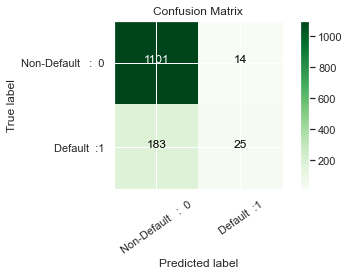

Classification report
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1115
           1       0.64      0.12      0.20       208

    accuracy                           0.85      1323
   macro avg       0.75      0.55      0.56      1323
weighted avg       0.82      0.85      0.81      1323

Accuracy of the model: 0.8510959939531368


In [143]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(Y_test,Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,Y_pred))

acc= accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:", acc)

# Adjusting the Threshold

In [144]:
#Store the predicted probabilitiles
y_pred_prob=lr.predict_proba(X_test)
print(y_pred_prob)

[[0.9936716  0.0063284 ]
 [0.60901835 0.39098165]
 [0.98030306 0.01969694]
 ...
 [0.8285391  0.1714609 ]
 [0.95222715 0.04777285]
 [0.81150444 0.18849556]]


In [145]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.25:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 

Confusion Matrix
[[922 193]
 [113  95]]


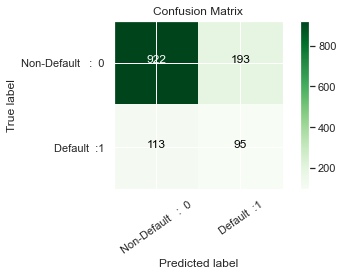

Classification report
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1115
           1       0.33      0.46      0.38       208

    accuracy                           0.77      1323
   macro avg       0.61      0.64      0.62      1323
weighted avg       0.80      0.77      0.78      1323

Accuracy of the model: 0.7687074829931972


In [146]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(Y_test,y_pred_class)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,y_pred_class))

acc= accuracy_score(Y_test,y_pred_class)
print("Accuracy of the model:", acc)

# Decision Tree Classifier

In [147]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier()
model_DecisionTree.fit(X_train,Y_train)

#fit the model on the data and predict the values
Y_pred=model_DecisionTree.predict(X_test)


Confusion Matrix
[[1091   24]
 [  18  190]]


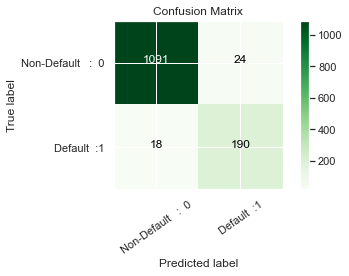

Classification report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1115
           1       0.89      0.91      0.90       208

    accuracy                           0.97      1323
   macro avg       0.94      0.95      0.94      1323
weighted avg       0.97      0.97      0.97      1323

Accuracy of the model: 0.9682539682539683


In [148]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(Y_test,Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,Y_pred))

acc= accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:", acc)

# Random Forest Classifier

In [149]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(100,random_state=10)

#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)
#%%

Confusion Matrix
[[1112    3]
 [  21  187]]


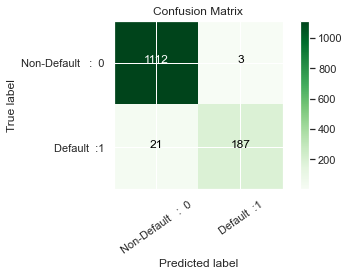

Classification report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1115
           1       0.98      0.90      0.94       208

    accuracy                           0.98      1323
   macro avg       0.98      0.95      0.96      1323
weighted avg       0.98      0.98      0.98      1323

Accuracy of the model: 0.981859410430839


In [150]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(Y_test,Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,Y_pred))

acc= accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:", acc)

# Gradient Boosting Classifier

In [153]:
#predicting using the 
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting=GradientBoostingClassifier(n_estimators=1000,)


#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)

Y_pred=model_GradientBoosting.predict(X_test)

Confusion Matrix
[[1106    9]
 [  21  187]]


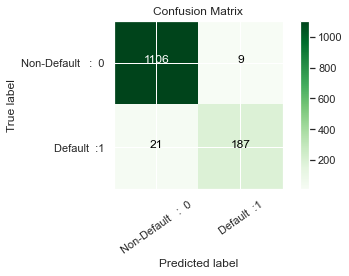

Classification report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1115
           1       0.95      0.90      0.93       208

    accuracy                           0.98      1323
   macro avg       0.97      0.95      0.96      1323
weighted avg       0.98      0.98      0.98      1323

Accuracy of the model: 0.9773242630385488


In [154]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(Y_test,Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,Y_pred))

acc= accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:", acc)

# SVM

In [155]:
#%%
from sklearn import svm
svc_model=svm.SVC(kernel='rbf',C=1.0,gamma=0.1)
svc_model.fit(X_train, Y_train)
Y_pred=svc_model.predict(X_test)
#print(list(Y_pred))


Confusion Matrix
[[1109    6]
 [  51  157]]


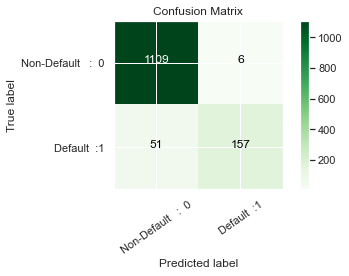

Classification report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1115
           1       0.96      0.75      0.85       208

    accuracy                           0.96      1323
   macro avg       0.96      0.87      0.91      1323
weighted avg       0.96      0.96      0.95      1323

Accuracy of the model: 0.9569160997732427


In [156]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(Y_test,Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,Y_pred))

acc= accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:", acc)

# KNN

In [159]:
#predicting using the KNeighbors_Classifier
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=19, metric='euclidean')
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)


Confusion Matrix
[[1096   19]
 [ 187   21]]


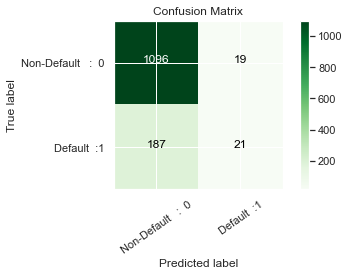

Classification report
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1115
           1       0.53      0.10      0.17       208

    accuracy                           0.84      1323
   macro avg       0.69      0.54      0.54      1323
weighted avg       0.80      0.84      0.80      1323

Accuracy of the model: 0.8442932728647015


In [160]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(Y_test,Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,Y_pred))

acc= accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:", acc)

# ANN - MLP Classifier

In [161]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100),max_iter=100, early_stopping=True,
                    random_state=10, activation="relu", solver="adam",learning_rate="constant",
                    learning_rate_init=0.01,verbose=True,n_iter_no_change=5)
mlp.fit(X_train,Y_train)
Y_pred = mlp.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

Iteration 1, loss = 0.46116950
Validation score: 0.841424
Iteration 2, loss = 0.36274839
Validation score: 0.844660
Iteration 3, loss = 0.32817653
Validation score: 0.844660
Iteration 4, loss = 0.30699315
Validation score: 0.867314
Iteration 5, loss = 0.28509657
Validation score: 0.857605
Iteration 6, loss = 0.26694714
Validation score: 0.873786
Iteration 7, loss = 0.24895965
Validation score: 0.864078
Iteration 8, loss = 0.22713192
Validation score: 0.877023
Iteration 9, loss = 0.20981089
Validation score: 0.886731
Iteration 10, loss = 0.19567592
Validation score: 0.883495
Iteration 11, loss = 0.18197861
Validation score: 0.899676
Iteration 12, loss = 0.16730245
Validation score: 0.909385
Iteration 13, loss = 0.15642818
Validation score: 0.909385
Iteration 14, loss = 0.14497012
Validation score: 0.922330
Iteration 15, loss = 0.14068918
Validation score: 0.915858
Iteration 16, loss = 0.12420874
Validation score: 0.915858
Iteration 17, loss = 0.11609599
Validation score: 0.925566
Iterat

Confusion Matrix
[[1103   12]
 [  29  179]]


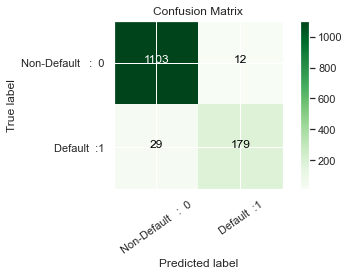

Classification report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1115
           1       0.94      0.86      0.90       208

    accuracy                           0.97      1323
   macro avg       0.96      0.92      0.94      1323
weighted avg       0.97      0.97      0.97      1323

Accuracy of the model: 0.9690098261526833


In [162]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(Y_test,Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,Y_pred))

acc= accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:", acc)